Import Librararies

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read The Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/Startups (1).csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Check the missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Describe the data

In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


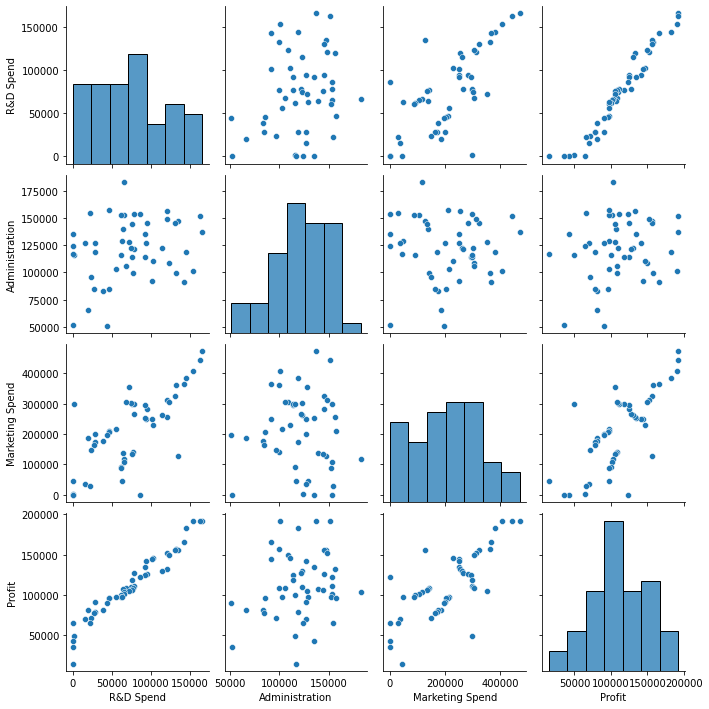

In [ ]:
sns.pairplot(df)

Check correlation between the data

In [ ]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


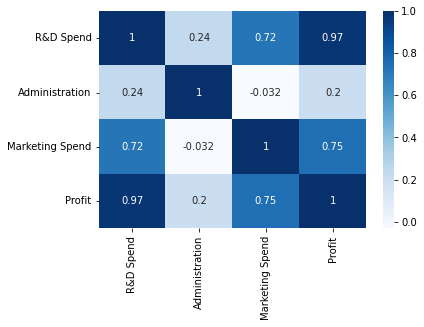

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Split Thea data

In [ ]:
x = df.iloc[:, :-2]
y = df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20, random_state=0)

Impoert the model


In [ ]:
#step1 -: import the model
from sklearn.neighbors import KNeighborsRegressor

#step2 -: create the object
knn = KNeighborsRegressor()

#step3 -: train the model
knn.fit(xtrain, ytrain)

#step4 -: make prediction
ypred = knn.predict(xtest)


Check accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
ac = r2_score(ytest, ypred)

print(f"MAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\nAccuracy : {ac}")

MAE : 10447.029400000007
MSE : 143358751.24623257
RMSE : 11973.251490143877
Accuracy : 0.8879039067653898


In [ ]:
train = knn.score(xtrain, ytrain)
test = knn.score(xtest, ytest)

print(f"Training Accuracy : {train}\nTesting Accuracy : {test}")

Training Accuracy : 0.8328876309194482
Testing Accuracy : 0.8879039067653898


# Hyperparameter Tuning

In [ ]:
trainac = []
testac = []

for i in range(1,31):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    
    train = knn.score(xtrain, ytrain)
    test = knn.score(xtest, ytest)
    
    trainac.append(train)
    testac.append(test)
    
    

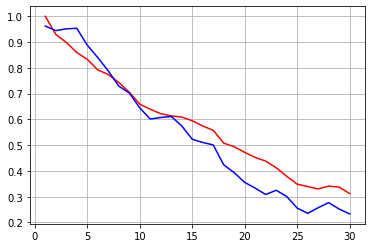

In [ ]:
plt.plot(range(1,31), trainac, color="red")
plt.plot(range(1,31), testac, color="blue")
plt.grid()

Again Import the module

In [ ]:
#step1 -: import the model
from sklearn.neighbors import KNeighborsRegressor

#step2 -: create the object
knn = KNeighborsRegressor(n_neighbors=2)

#step3 -: train the model
knn.fit(xtrain, ytrain)

#step4 -: make prediction
ypred = knn.predict(xtest)


In [ ]:
train = knn.score(xtrain, ytrain)
test = knn.score(xtest, ytest)

print(f"Training Accuracy : {train}\nTesting Accuracy : {test}")

Training Accuracy : 0.9294234963316742
Testing Accuracy : 0.9442829781028822


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
ac = r2_score(ytest, ypred)

print(f"MAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\nAccuracy : {ac}")

MAE : 6226.290500000003
MSE : 71256030.89139262
RMSE : 8441.32873968267
Accuracy : 0.9442829781028822


# Forecasting the New Observation

In [ ]:
def profit():
    rnd = float(input("Enter the RND Amount : "))
    ad = float(input("Enter the Administration Amount : "))
    ms = float(input("Enter the Marketing Amount : "))

    newob = [[rnd, ad, ms]]
    yp = knn.predict(newob)[0]
    print(f"The Profit will be of $ {yp}")
    return yp

In [ ]:
profit()

Enter the RND Amount : 1225
Enter the Administration Amount : 2223
Enter the Marketing Amount : 245
The Profit will be of $ 50299.745


50299.745